In [62]:
import pandas as pd 
import requests
import unicodedata
from tqdm import tqdm
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns

In [2]:
wiki_data = pd.read_csv('wiki_languages_most_recent.csv')
# wiki_data

In [3]:
unesco_data = pd.read_csv('extinct_languages_with_info.csv')
# unesco_data

In [6]:
wiki_data = wiki_data.drop(columns=['Unnamed: 0'])
wiki_data

,lang,family,dialects,iso3code,speakers,regions,off_lang,rec_min_lang
0,Durango,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Azoyu_Me%E2%80%99phaa_language,"['Oto-Manguean', 'Tlapanecan', 'Tlapanec']",NaN,Variously:tcf – Malinaltepec (east)tpc – Azoyú...,"150,000 (2020 census)[1]","Guerrero, Morelos",NaN,NaN
2,Mizoram,NaN,NaN,NaN,NaN,Northeast India,NaN,NaN
3,Herero_language,"['Niger–Congo', '?\n', 'Atlantic–Congo', 'Volt...","['Himba', 'Kuvale', 'Zemba', ' (Thimba, ', 'Ot...",her Herero,"250,000 (2015–2018)[1]","Kunene, Omaheke Region and Otjozondjupa Region...",NaN,NaN
4,Azad_Kashmir,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1325,Isle_of_Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1326,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1327,U.S._state,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,Uzbek_language,"['Turkic', 'Common Turkic', 'Karluk', '[2]', '...",['Southern Uzbek'],uzb – inclusive codeIndividual codes:uzn – Nor...,33 million (incl. 29 million Northern Uzbek & ...,Central Asia,\nUzbekistan\nOrganization of Turkic States\n,\nAfghanistan[b]\nChina[4]\nTajikistan\nKazakh...


In [8]:
# row = wiki_data.iloc[2]
# region = row['regions'].lower()

# id_min = unesco_data['Country/Region'].apply(lambda x: wiki_data(x.lower(), region)).idxmin()

# unesco_data.iloc[id_min]

In [11]:
# Glottolog is very specific in naming dialects and other varieties, so iso codes will likely be more navigable

wiki_lang = wiki_data['lang'].to_list()
unesco_lang = unesco_data['lang'].to_list()
wiki_unesco_lang = pd.DataFrame({'Agg': list(set(wiki_lang) & set(unesco_lang))})


In [54]:
merged

,lang,family_x,dialects_x,iso3code_x,speakers_x,regions_x,off_lang_x,rec_min_lang_x,family_y,dialects_y,iso3code_y,speakers_y,regions_y,off_lang_y,rec_min_lang_y,family,regions,speakers
0,%27Phags-pa_script,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,%C3%84ynu_language,"['Turkic', 'Common Turkic', 'Karluk', '[2]', '...",NaN,aib,"12,000 (2017)[1]",Xinjiang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Turkic', 'Common Turkic', 'Karluk', '[2]', '...",Xinjiang,"12,000 (2017)[1]"
2,%C3%91andeva_language,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Tupian', 'Tupí–Guaraní', 'Guaraní (I)', 'Gua...",NaN,nhd,"(16,350 cited 1995–2012)[1]",NaN,NaN,NaN,"['Tupian', 'Tupí–Guaraní', 'Guaraní (I)', 'Gua...",NaN,"(16,350 cited 1995–2012)[1]"
3,%C7%81Xegwi_language,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Tuu', '\nǃKwi', 'Eastern', 'ǁXegwi']",NaN,xeg,NaN,South Africa,NaN,NaN,"['Tuu', '\nǃKwi', 'Eastern', 'ǁXegwi']",South Africa,NaN
4,%C7%82Akhoe_dialect,"['Khoe–Kwadi', 'Khoe', 'Khoekhoe', 'Khoekhoego...",NaN,hgm (Haiǁom),"52,000 (2003–2016)[1]","Etosha pan, Kavango, Mangetti Dune, Omataku, G...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Khoe–Kwadi', 'Khoe', 'Khoekhoe', 'Khoekhoego...","Etosha pan, Kavango, Mangetti Dune, Omataku, G...","52,000 (2003–2016)[1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,Zulu_language,"['Niger–Congo', '?\n', 'Atlantic–Congo', 'Volt...","['KwaZulu Natal Zulu', 'Transvaal Zulu', 'Qwab...",zul,13 million (2022 census)[1]L2 speakers: 16 mil...,\nKwaZulu-Natal and southern Mpumalanga; scatt...,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Niger–Congo', '?\n', 'Atlantic–Congo', 'Volt...",\nKwaZulu-Natal and southern Mpumalanga; scatt...,13 million (2022 census)[1]L2 speakers: 16 mil...
3021,Zumaia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3022,Zuni_language,['Language isolate'],NaN,zun,"9,620 (2015)[1]",Western New Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Language isolate'],Western New Mexico,"9,620 (2015)[1]"
3023,Zuruah%C3%A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# wiki_data['name_normalized'] = wiki_data['lang'].str.lower()
# unesco_data['name_normalized'] = unesco_data['lang'].str.lower()

merged = pd.merge(wiki_data, unesco_data, left_on='lang', right_on='lang', how='outer')
merged['family'] = merged.apply(lambda row: row['family_x'] if pd.isnull(row['family_y']) else row['family_y'], axis=1)
merged['dialects'] = merged.apply(lambda row: row['dialects_x'] if pd.isnull(row['dialects_y']) else row['dialects_y'], axis=1)
merged['iso3code'] = merged.apply(lambda row: row['iso3code_x'] if pd.isnull(row['iso3code_y']) else row['iso3code_y'], axis=1)
merged['speakers'] = merged.apply(lambda row: row['speakers_x'] if pd.isnull(row['speakers_y']) else row['speakers_y'], axis=1)
merged['regions'] = merged.apply(lambda row: row['regions_x'] if pd.isnull(row['regions_y']) else row['regions_y'], axis=1)
merged['off_lang'] = merged.apply(lambda row: row['off_lang_x'] if pd.isnull(row['off_lang_y']) else row['off_lang_y'], axis=1)
merged['rec_min_lang'] = merged.apply(lambda row: row['rec_min_lang_x'] if pd.isnull(row['rec_min_lang_y']) else row['rec_min_lang_y'], axis=1)
merged.drop(columns=['family_x', 'family_y', 'dialects_x', 'dialects_y', 'iso3code_x', 'iso3code_y', 'speakers_x', 'speakers_y', 'regions_x', 'regions_y', 'off_lang_x', 'off_lang_y', 'rec_min_lang_x', 'rec_min_lang_y'], inplace=True)
merged
# what does how = 'outer' do in pd.merge()?




# merged_drop_na = merged.dropna(subset=['iso3codes'])
# merged_mass = pd.merge(merged, wiki_data, left_on = 'isocodes', right_on = 'iso3code', how = 'inner')

,lang,family,dialects,iso3code,speakers,regions,off_lang,rec_min_lang
0,%27Phags-pa_script,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,%C3%84ynu_language,"['Turkic', 'Common Turkic', 'Karluk', '[2]', '...",NaN,aib,"12,000 (2017)[1]",Xinjiang,NaN,NaN
2,%C3%91andeva_language,"['Tupian', 'Tupí–Guaraní', 'Guaraní (I)', 'Gua...",NaN,nhd,"(16,350 cited 1995–2012)[1]",NaN,NaN,NaN
3,%C7%81Xegwi_language,"['Tuu', '\nǃKwi', 'Eastern', 'ǁXegwi']",NaN,xeg,NaN,South Africa,NaN,NaN
4,%C7%82Akhoe_dialect,"['Khoe–Kwadi', 'Khoe', 'Khoekhoe', 'Khoekhoego...",NaN,hgm (Haiǁom),"52,000 (2003–2016)[1]","Etosha pan, Kavango, Mangetti Dune, Omataku, G...",NaN,NaN
...,...,...,...,...,...,...,...,...
3020,Zulu_language,"['Niger–Congo', '?\n', 'Atlantic–Congo', 'Volt...","['KwaZulu Natal Zulu', 'Transvaal Zulu', 'Qwab...",zul,13 million (2022 census)[1]L2 speakers: 16 mil...,\nKwaZulu-Natal and southern Mpumalanga; scatt...,South Africa,NaN
3021,Zumaia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3022,Zuni_language,['Language isolate'],NaN,zun,"9,620 (2015)[1]",Western New Mexico,NaN,NaN
3023,Zuruah%C3%A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
merged.to_csv('general_language_info_merged.csv', index=False)

In [60]:
merged.isna().sum()/len(merged)

lang            0.000000
family          0.364298
dialects        0.852893
iso3code        0.359008
speakers        0.439008
regions         0.487603
off_lang        0.884959
rec_min_lang    0.932562
dtype: float64

/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_18201/525709964.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = merged.columns, x = merged.isna().sum()/len(merged), palette = 'viridis')


<Axes: xlabel='None', ylabel='None'>

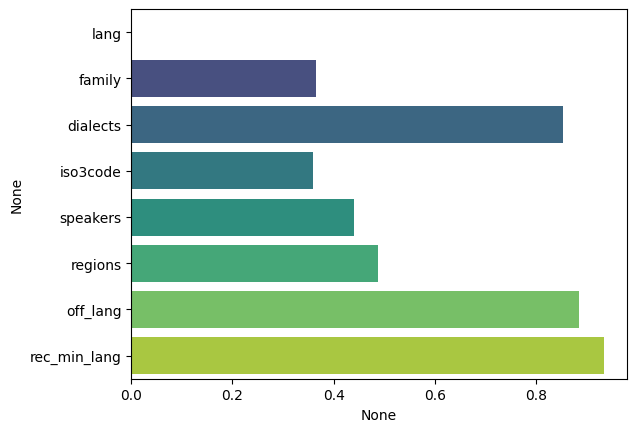

In [86]:
sns.barplot(y = merged.columns, x = merged.isna().sum()/len(merged), palette = 'viridis')